In [4]:
import gym_unbalanced_disk
import gym
import numpy as np
from matplotlib import pyplot as plt

In [5]:
env = gym_unbalanced_disk.UnbalancedDisk(umax = 4.0)

def get_exp(Nsamps,q,f0,umax=3.0,seed=46):
    print(q,f0)
    np.random.seed(seed)
    from scipy import signal
    u0 = np.random.uniform(-1,1,size=Nsamps)
    if f0<1:
        u1 = signal.lfilter(*signal.butter(6,f0),u0)
    else:
        u1 = u0
    
    u1 /= max(np.max(u1),-np.min(u1))
    
    return umax*abs(u1)**(1/q)*np.sign(u1) if np.isfinite(q) else umax*np.sign(u1)

def apply_exp(ulist):
    obs = env.reset()
    ylist = []
    for u in ulist:
        ylist.append(obs)
        obs, reward, done, info = env.step(u)
    return np.array(ylist)

1 1.0
1.0


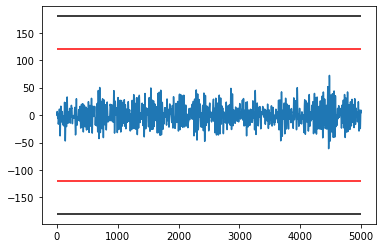

1 0.668740304976422
0.668740304976422


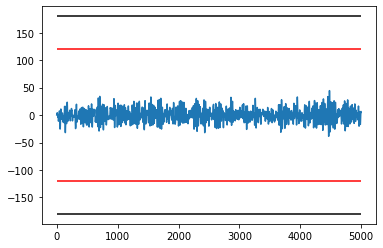

1 0.447213595499958
0.447213595499958


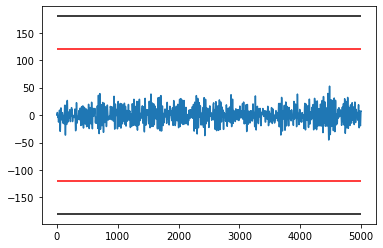

1 0.29906975624424414
0.29906975624424414


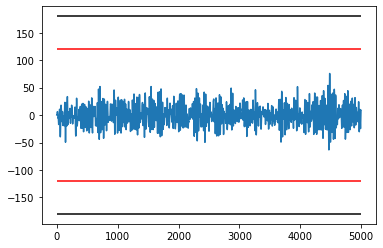

1 0.20000000000000004
0.20000000000000004


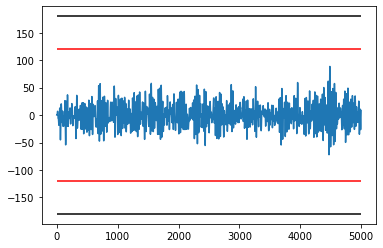

2 1.0
1.0


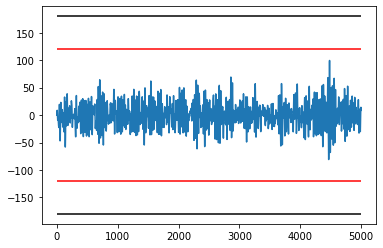

2 0.668740304976422
0.668740304976422


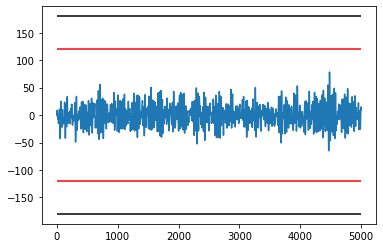

2 0.447213595499958
0.447213595499958


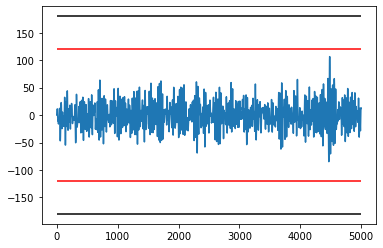

2 0.29906975624424414
0.29906975624424414


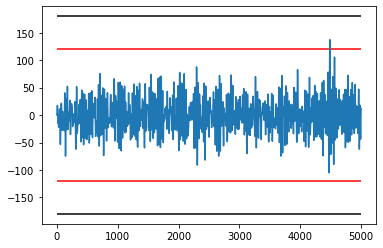

2 0.20000000000000004
0.20000000000000004


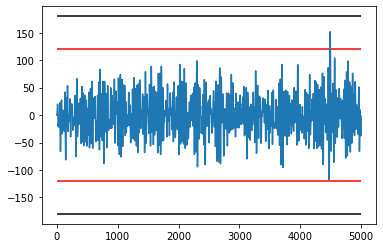

4 1.0
1.0


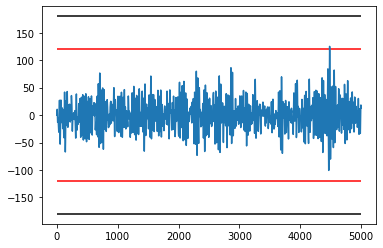

4 0.668740304976422
0.668740304976422


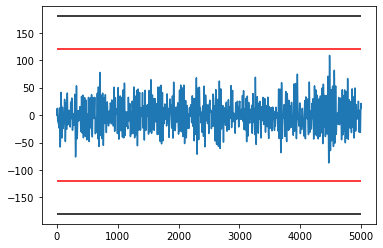

4 0.447213595499958
0.447213595499958


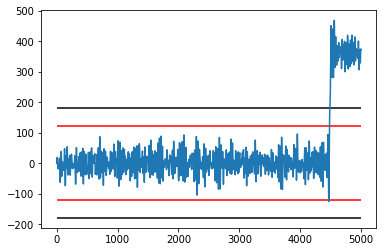

4 0.29906975624424414
0.29906975624424414


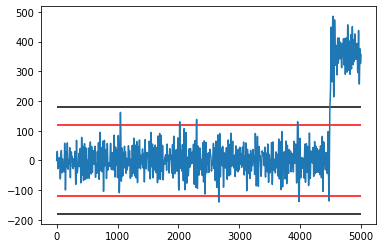

4 0.20000000000000004
0.20000000000000004


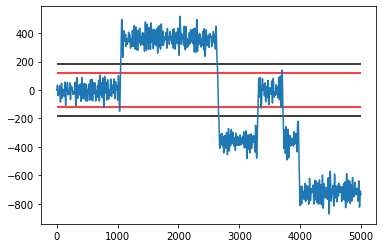

8 1.0
1.0


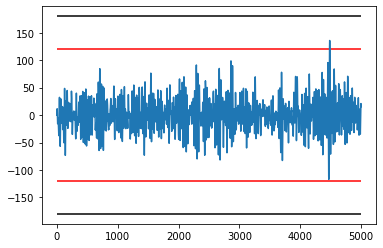

8 0.668740304976422
0.668740304976422


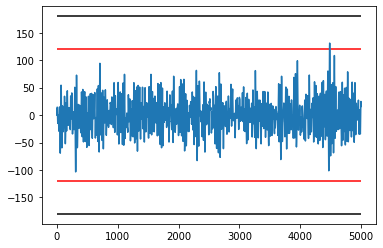

8 0.447213595499958
0.447213595499958


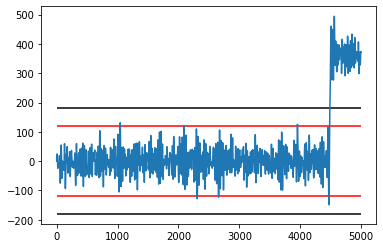

8 0.29906975624424414
0.29906975624424414


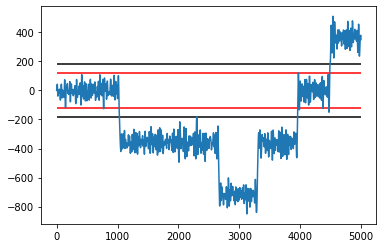

8 0.20000000000000004
0.20000000000000004


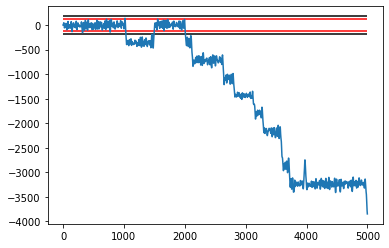

16 1.0
1.0


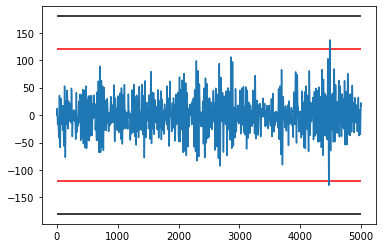

16 0.668740304976422
0.668740304976422


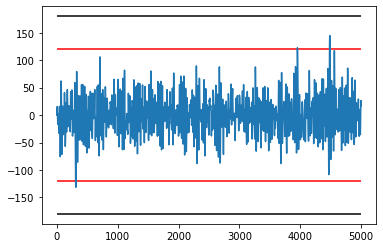

16 0.447213595499958
0.447213595499958


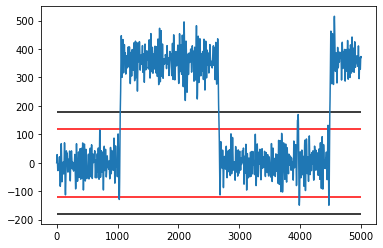

16 0.29906975624424414
0.29906975624424414


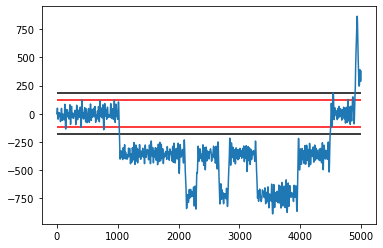

16 0.20000000000000004
0.20000000000000004


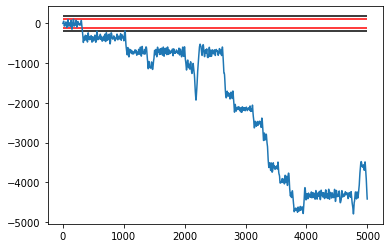

In [1]:
#different q and f0:
for q in [1,2,4,8,16]:
    for f0 in np.geomspace(1.0,0.20,num=5):
        N = 5000
        ulist = get_exp(N,q,f0)
        ylist = apply_exp(ulist)

        print(f0)
        plt.plot((ylist[:,0]-np.pi)/(np.pi*2)*360)
        plt.hlines([-180,180],0,len(ulist),color='k')
        plt.hlines([-120,120],0,len(ulist),color='r')
        plt.show()

3 0.24


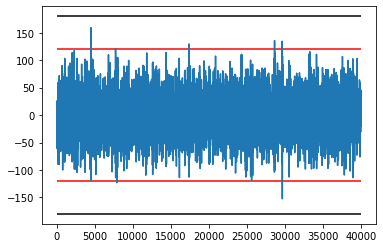

In [8]:
#picking one which keeps within the range
q = 3
f0 = 0.24
N = 40000
ulist = get_exp(N,q,f0,seed=46) #other seeds: 55, 46, 48

ylist = apply_exp(ulist)
degree = lambda x: x/(np.pi*2)*360
plt.plot(degree(ylist[:,0]))
plt.hlines([-180,180],0,len(ulist),color='k')
plt.hlines([-120,120],0,len(ulist),color='r')
plt.show()

save_dic = dict(ulist=ulist,ylist=ylist[:,0])

np.savez('UnbalancedDisk-sim-data.npz',**save_dic)
from scipy.io import savemat
savemat('UnbalancedDisk-sim-data.mat', save_dic)